
 <center> Pinecone Assistant Based PDF Analyser </center>


**🔹 What is a Pinecone-Powered Assistant?**

A Pinecone-powered assistant is an AI-driven application that leverages vector databases to efficiently search and retrieve relevant information from large datasets, such as PDFs, documents, or even entire knowledge bases. It is commonly used in Retrieval-Augmented Generation (RAG) systems to enhance the accuracy of language models by grounding their responses in real-world data.



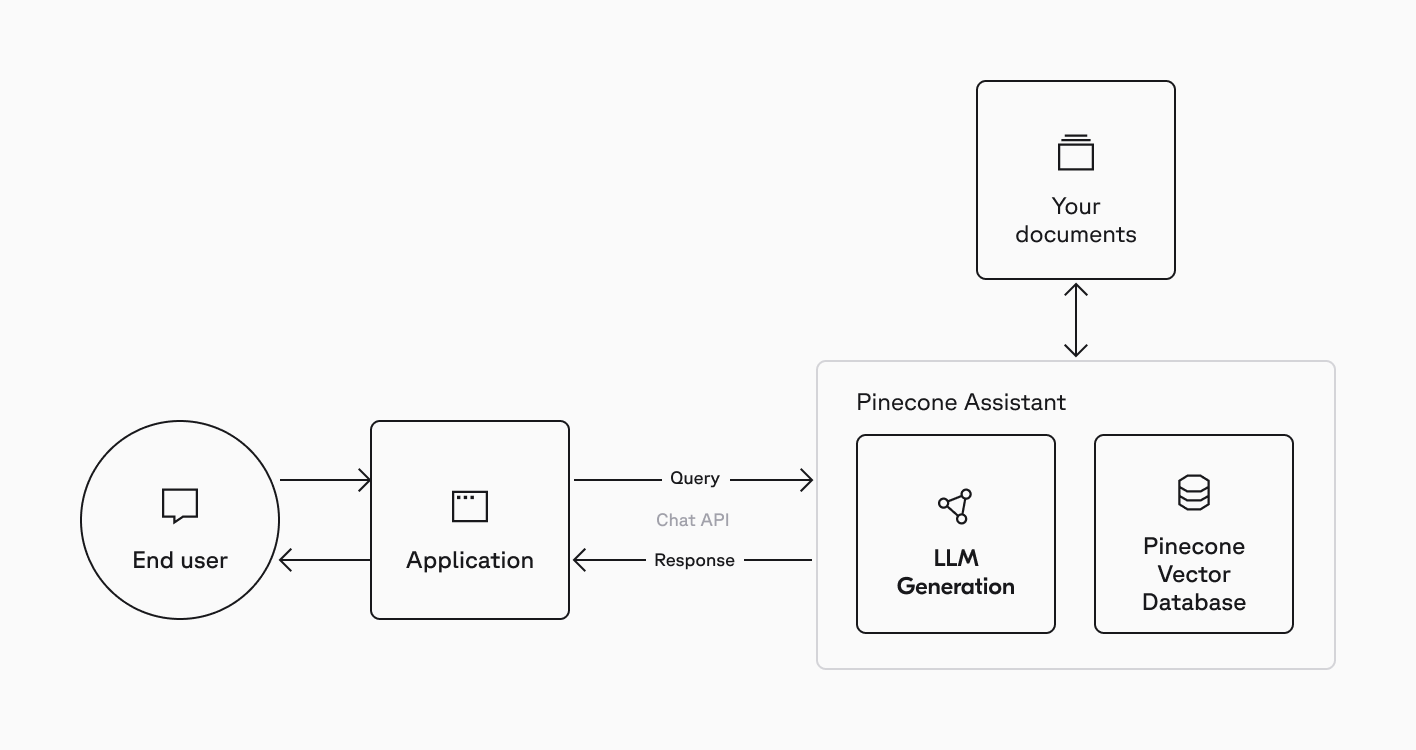

In [ ]:
!pip install langchain
!pip install langchain-community
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken
!pip install pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.4/421.4 kB 20.3 MB/s eta 0:00:00


In [ ]:
!pip install pinecone

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings  # Import a specific embedding class like OpenAIEmbeddings
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import CharacterTextSplitter
# Removed the problematic import: from langchain.embeddings import Embeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.document_loaders import TextLoader
import openai
from transformers import AutoTokenizer, AutoModelForMaskedLM
# Import the Pinecone library
import numpy as np
import openai
# Import the Pinecone library
import pinecone
import time

In [ ]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key="pinecone_api_key")

In [ ]:
# Initialize OpenAI API
openai.api_key = "OPENAI_API_KEY"


In [ ]:
index_name = "YOUR_INDEX_NAME"  # Choose a name for your index

# Assuming pinecone_client is your Pinecone instance
if index_name not in pc.list_indexes().names():  # Use pinecone_client.list_indexes()
    # Create the index if it doesn't exist
    pc.create_index(  # Use pinecone_client.create_index()
        name=index_name,
        spec={"pod_type": "p1", "replicas": 1},
        dimension=1536,  # This should match the dimensionality of your embeddings
        metric="cosine"  # You can change the metric if needed
    )

# Connect to the index using pinecone_client
index = pc.Index(index_name)  # Use pinecone_client.Index()

In [ ]:
!pip install pinecone-plugin-assistant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.2/235.2 kB 13.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pinecone pinecone-plugin-assistant

In [ ]:
from pinecone import Pinecone
pc = Pinecone(api_key="Pinecone_api_key")

assistant = pc.assistant.Assistant(
    assistant_name="Assistant_name"
)
# This version is been tested on text files and the below path represents reading a text file.
response = assistant.upload_file(
    file_path="/content/drive/MyDrive/Colab Notebooks/Multiple_Files_Assistant/PDFs/Learn/Cryptography 1 Quantized_Gaussian_JPEG_Steganography_and_Pool_Steganalysis.pdf",
    timeout=None
)

In [ ]:
from pinecone_plugins.assistant.models.chat import Message  # Import Message class

# msg = Message(content="What do u mean by Steganography?")
# resp = assistant.chat(messages=[msg])

msg = Message(role="user", content="What do u mean by Steganography?")
response = assistant.chat(messages=[msg], stream=True)

for data in response:
    if data:
        print(data)
print(resp["message"]["content"])

{'type': 'message_start', 'model': 'gpt-4o-2024-11-20', 'role': 'assistant'}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': 'Ste'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': 'gan'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': 'ography'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': ' is'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': ' the'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': ' art'}}
{'id': '000000000000000041a267bcd4ef9157', 'type': 'content_chunk', 'model': 'gpt-4o-2024-11-20', 'delta': {'content': ' of'}}
{'id': '000000000000000041a2

Steganography is the art of embedding a hidden message within a cover medium, such as digital images, in a way that prevents detection by an observer or "warden." The goal is to conceal the existence of the message rather than encrypting its content. Digital images are commonly used for steganography because they have high redundancy, which provides a large capacity for embedding hidden information.

In [ ]:
msg = Message(content="Can u let me know about the A flowchart of the proposed JPEG Gaussian embedding model.")
resp = assistant.chat(messages=[msg])

print(resp["message"]["content"])

The search results do not provide a direct description or visual representation of the flowchart for the proposed JPEG Gaussian embedding model. However, they do mention that the methodology of the proposed model is illustrated in a flowchart (Figure 1) in the document. This flowchart likely outlines the steps involved in the JPEG Gaussian embedding process, which includes deriving residual variances, calculating embedding costs, solving equations using methods like Newton-Raphson, and encoding the hidden message into the scaled DCT coefficients of the stego image. 

If you need the exact flowchart, you would need to refer to the original document where Figure 1 is presented.


The search results do not provide a direct description or visual representation of the flowchart for the proposed JPEG Gaussian embedding model. However, they do mention that the methodology of the proposed model is illustrated in a flowchart (Figure 1) in the document. This flowchart likely outlines the steps involved in the JPEG Gaussian embedding process, which includes deriving residual variances, calculating embedding costs, solving equations using methods like Newton-Raphson, and encoding the hidden message into the scaled DCT coefficients of the stego image.

If you need the exact flowchart, you would need to refer to the original document where Figure 1 is presented.

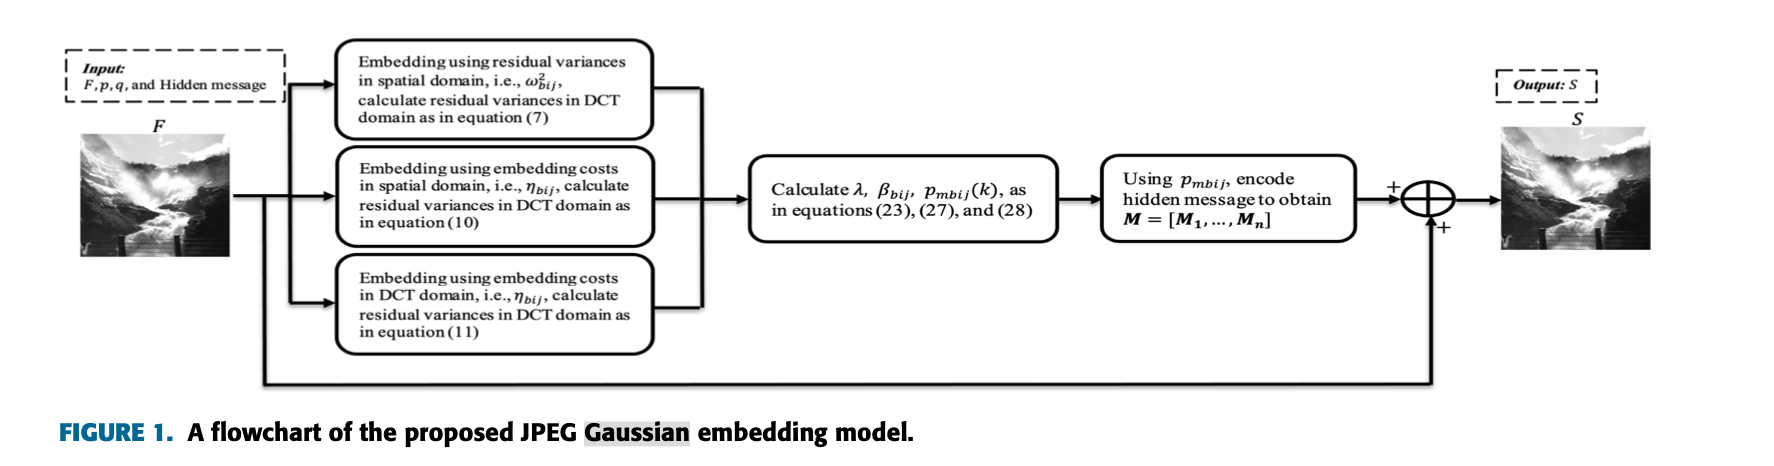

In [ ]:
msg = Message(content="Which embedding algorithm performs better according the paper?")
resp = assistant.chat(messages=[msg])

print(resp["message"]["content"])

According to the paper, the proposed G-JHILL algorithm outperforms all the other embedding algorithms in terms of security across all payloads and JPEG quality factors. It either performs better or is statistically similar to the most secure alternative methods, such as G-JUNIWARD and UERD, depending on the payload and JPEG quality factor.


According to the paper, the proposed G-JHILL algorithm outperforms all the other embedding algorithms in terms of security across all payloads and JPEG quality factors. It either performs better or is statistically similar to the most secure alternative methods, such as G-JUNIWARD and UERD, depending on the payload and JPEG quality factor.



In [ ]:
msg = Message(content="What is the computational time taken give me top 2 pperforming algorithms.")
resp = assistant.chat(messages=[msg])

print(resp["message"]["content"])

The computational time for embedding a coded hidden message in a JPEG image varies depending on the algorithm used. Among the algorithms studied, the top two performing algorithms in terms of security and performance are **G-JHILL** and **G-JUNIWARD**. However, these algorithms also have higher computational times compared to their original versions.

1. **G-JHILL (with Whitening)**: This algorithm is 2 to 3 times slower than the original G-JHILL algorithm. The computational time increases with higher payloads, but the JPEG quality factor does not significantly affect the computation time.

2. **G-JUNIWARD**: The Gaussian version of JUNIWARD (G-JUNIWARD) is 2 to 5 times slower than the original JUNIWARD algorithm. Despite the increased computational time, it offers higher performance.

These algorithms prioritize security and performance, which justifies their longer computational times.


The computational time for embedding a coded hidden message in a JPEG image varies depending on the algorithm used. Among the algorithms studied, the top two performing algorithms in terms of security and performance are **G-JHILL** and **G-JUNIWARD**. However, these algorithms also have higher computational times compared to their original versions.

1. **G-JHILL (with Whitening)**: This algorithm is 2 to 3 times slower than the original G-JHILL algorithm. The computational time increases with higher payloads, but the JPEG quality factor does not significantly affect the computation time.

2. **G-JUNIWARD**: The Gaussian version of JUNIWARD (G-JUNIWARD) is 2 to 5 times slower than the original JUNIWARD algorithm. Despite the increased computational time, it offers higher performance.

These algorithms prioritize security and performance, which justifies their longer computational times.

In [ ]:
msg = Message(content="What is the ultimatum of doing this paper and what is the conclusion that i can get out of it?")
resp = assistant.chat(messages=[msg])

print(resp["message"]["content"])

The primary goal of the paper is to develop a statistical framework for JPEG steganography and pool steganalysis using a quantized Gaussian embedding model. This model aims to improve the security and performance of existing JPEG steganography methods while providing a mathematical basis for understanding and approximating detection errors in both single image and pooled image scenarios. The paper also seeks to address the limitations of heuristic-based methods by offering closed-form solutions for steganalysis errors, which can be applied across various payloads, embedding domains, and methods.

The conclusions drawn from the study are as follows:

1. **Improved Steganography Performance**: The proposed quantized Gaussian embedding model enhances the performance of existing JPEG steganography algorithms across most payloads. It achieves superior results, particularly when embedding costs are calculated using the HILL algorithm.

2. **Closed-Form Solutions for Steganalysis**: The study

The primary goal of the paper is to develop a statistical framework for JPEG steganography and pool steganalysis using a quantized Gaussian embedding model. This model aims to improve the security and performance of existing JPEG steganography methods while providing a mathematical basis for understanding and approximating detection errors in both single image and pooled image scenarios. The paper also seeks to address the limitations of heuristic-based methods by offering closed-form solutions for steganalysis errors, which can be applied across various payloads, embedding domains, and methods.

The conclusions drawn from the study are as follows:

1. **Improved Steganography Performance**: The proposed quantized Gaussian embedding model enhances the performance of existing JPEG steganography algorithms across most payloads. It achieves superior results, particularly when embedding costs are calculated using the HILL algorithm.

2. **Closed-Form Solutions for Steganalysis**: The study derives closed-form expressions for the detection error of single image steganalysis and extends these to pool steganalysis. These expressions allow for accurate approximations of empirical results, making it possible to predict detection errors without running extensive experiments.

3. **Variance Behavior in Pool Steganalysis**: The paper reveals that while pooling improves detection error, it increases the variance of the detector for small payloads and high pool sizes. This makes the detector less stable in such scenarios, highlighting a trade-off between reliability and stability in pool steganalysis.

4. **Practical Implications**: The proposed model is versatile and can be applied to various embedding methods and domains, as long as the pooling strategy is optimal. It also provides insights into the behavior of detection error variance, which has not been previously discussed in the literature.

In summary, the paper advances the field of JPEG steganography by offering a robust statistical framework that improves security, provides accurate error approximations, and highlights the trade-offs in pool steganalysis. It sets the stage for future research, such as extending the model to video steganography or exploring side-informed steganography.
